# Install detectron2

In [1]:
!pip install pyyaml


In [2]:
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [3]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)


PyTorch version: 2.1.0+cu118
CUDA version: 11.8


In [4]:
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2


fatal: destination path 'detectron2' already exists and is not an empty directory.
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [5]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.11/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.11/index.html


In [6]:
# Check PyTorch installation
import torch, torchvision

# Print the installed version and check CUDA availability
print(f"PyTorch version: {torch.__version__}, CUDA available: {torch.cuda.is_available()}")

# Check if the installed PyTorch version starts with a specific string, e.g., "1.9" or "2.1"
target_versions = ["1.9", "2.1"]
if not any(torch.__version__.startswith(ver) for ver in target_versions):
    print(f"Please manually install one of the target PyTorch versions: {target_versions}")


PyTorch version: 2.1.0+cu118, CUDA available: True


In [7]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html


In [8]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [9]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Run a pre-trained detectron2 model

We first download an image from the COCO dataset:

--2023-10-19 23:04:52--  https://as1.ftcdn.net/v2/jpg/06/20/75/16/1000_F_620751695_UaJ8sY7P5C5QKMKTFotiXhh5K4pgflNA.jpg
Resolving as1.ftcdn.net (as1.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to as1.ftcdn.net (as1.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278520 (272K) [image/jpeg]
Saving to: ‘downloaded_image.jpg’

downloaded_image.jp 100%[===================>] 271.99K  --.-KB/s    in 0.02s   

2023-10-19 23:04:52 (13.9 MB/s) - ‘downloaded_image.jpg’ saved [278520/278520]



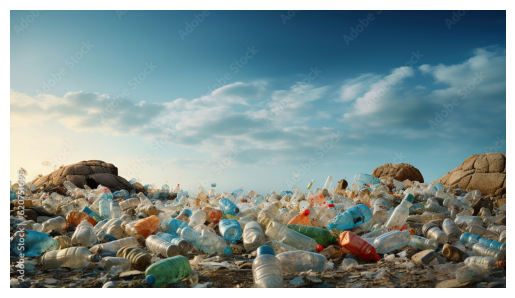

In [10]:
# Download the image using wget
!wget https://as1.ftcdn.net/v2/jpg/06/20/75/16/1000_F_620751695_UaJ8sY7P5C5QKMKTFotiXhh5K4pgflNA.jpg -O downloaded_image.jpg

# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# Read the downloaded image from disk
image = cv2.imread('downloaded_image.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


Then, we create a detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [11]:
cfg = get_cfg()

### Object Detection
["...object detection, where the goal is to classify individual objects and localize them using a bounding box..."](https://kharshit.github.io/blog/2019/08/23/quick-intro-to-instance-segmentation)

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
--2023-10-19 23:05:07--  https://as1.ftcdn.net/v2/jpg/06/20/75/16/1000_F_620751695_UaJ8sY7P5C5QKMKTFotiXhh5K4pgflNA.jpg
Resolving as1.ftcdn.net (as1.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to as1.ftcdn.net (as1.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278520 (272K) [image/jpeg]
Saving to: ‘downloaded_image.jpg’

downloaded_image.jp 100%[===================>] 271.99K  --.-KB/s    in 0.01s   

2023-10-19 23:05:07 (22.4 MB/s) - ‘downloaded_image.jpg’ saved [278520/278520]

[10/19 23:05:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


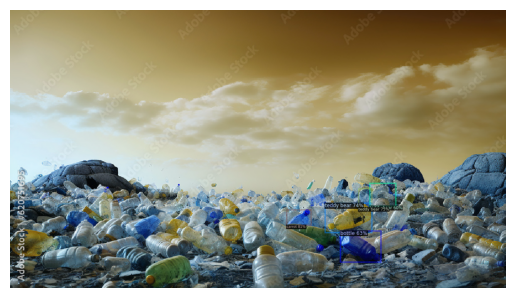

In [12]:
# Install dependencies
!pip install -U torch torchvision
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

# Download the image
!wget "https://as1.ftcdn.net/v2/jpg/06/20/75/16/1000_F_620751695_UaJ8sY7P5C5QKMKTFotiXhh5K4pgflNA.jpg" -O "downloaded_image.jpg"

# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

# Setup detectron2 model
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

# Read the image
im = cv2.imread("downloaded_image.jpg")

# Make prediction
outputs = predictor(im)

# Import visualization utils
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Visualize the result
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()


In [13]:
# Object Detection
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

[10/19 23:05:25 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl ...


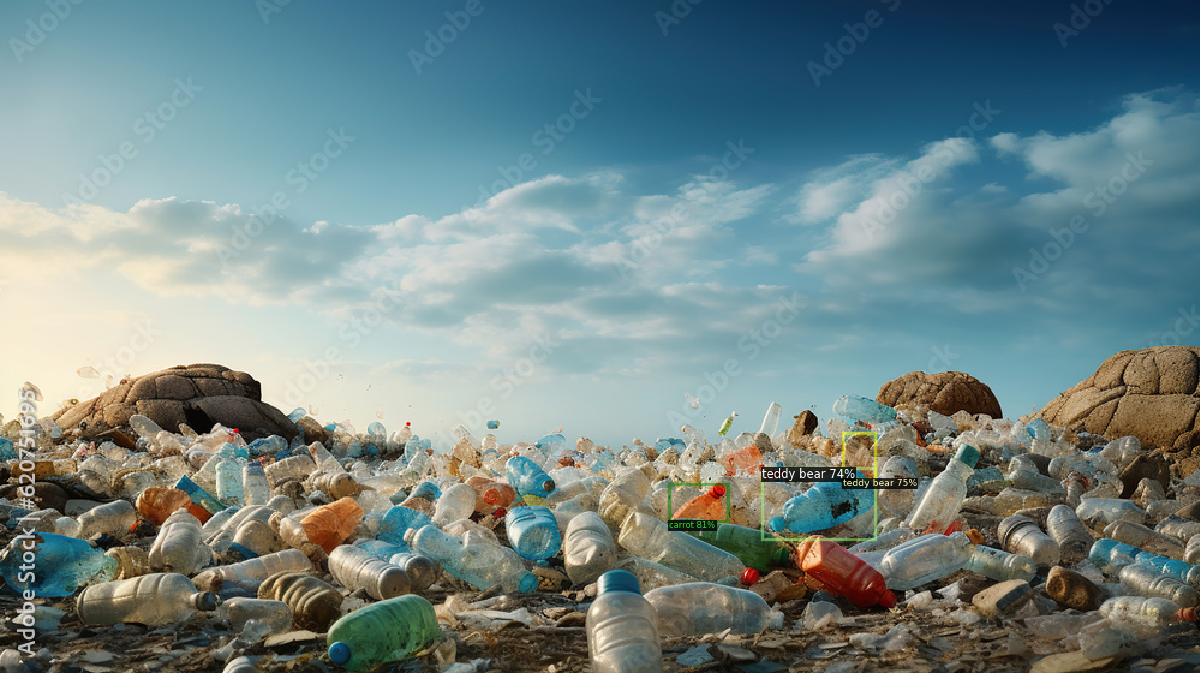

In [14]:
# Object Detection Visualizer
predictions = predictor(im)["instances"]
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(predictions.to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

### Instance Segmentation
["...instance segmentation, we care about detection and segmentation of the instances of objects separately"](https://kharshit.github.io/blog/2019/08/23/quick-intro-to-instance-segmentation)

In other words, we perform segmentation only on the objects detected within the bounding box of object detection.

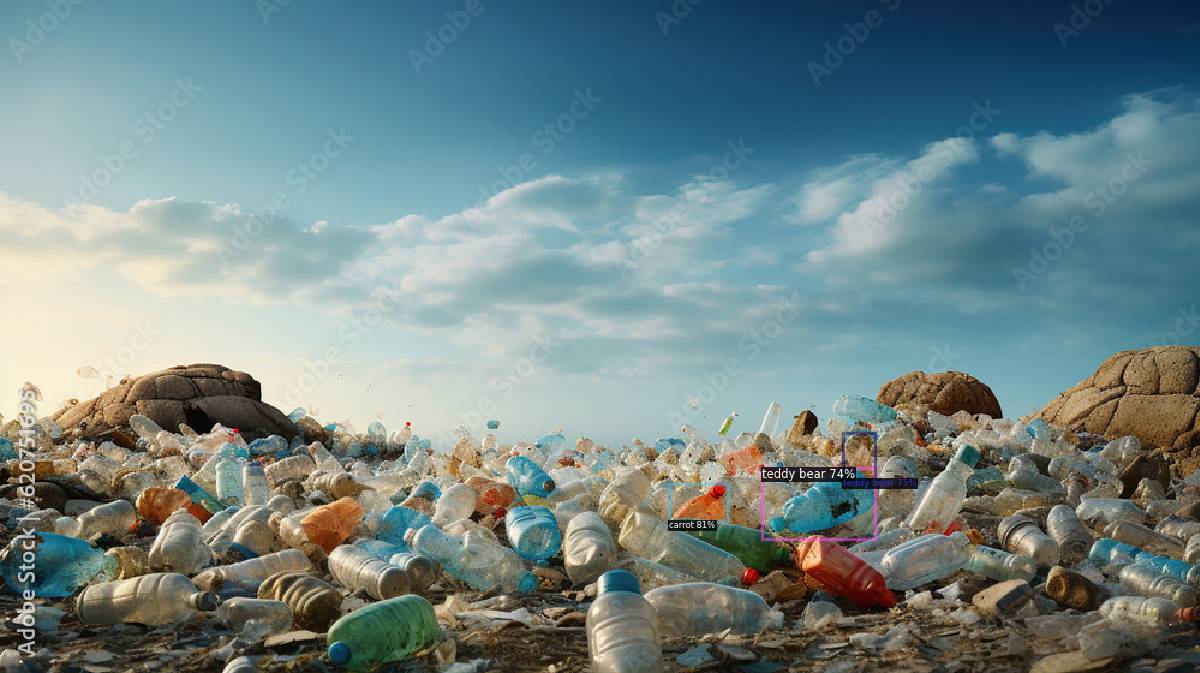

In [15]:
# Instance Segmentation Visualizer
predictions = predictor(im)["instances"]
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(predictions.to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

### Panoptic Segmentation
["...panoptic segmentation combines semantic and instance segmentation such that all pixels are assigned a class label and all object instances are uniquely segmented."](https://kharshit.github.io/blog/2019/10/18/introduction-to-panoptic-segmentation-tutorial)

Panoptic segmentation classifies all pixels in the image within a polygonal bounding area including objects and background scenery. Unlike, object and Instance segmentation which only care about individual objects in the image.



In [16]:
# Panoptic Segmentation
# Ref: https://www.youtube.com/watch?v=ju_2NuK5O-E
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

[10/19 23:05:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...


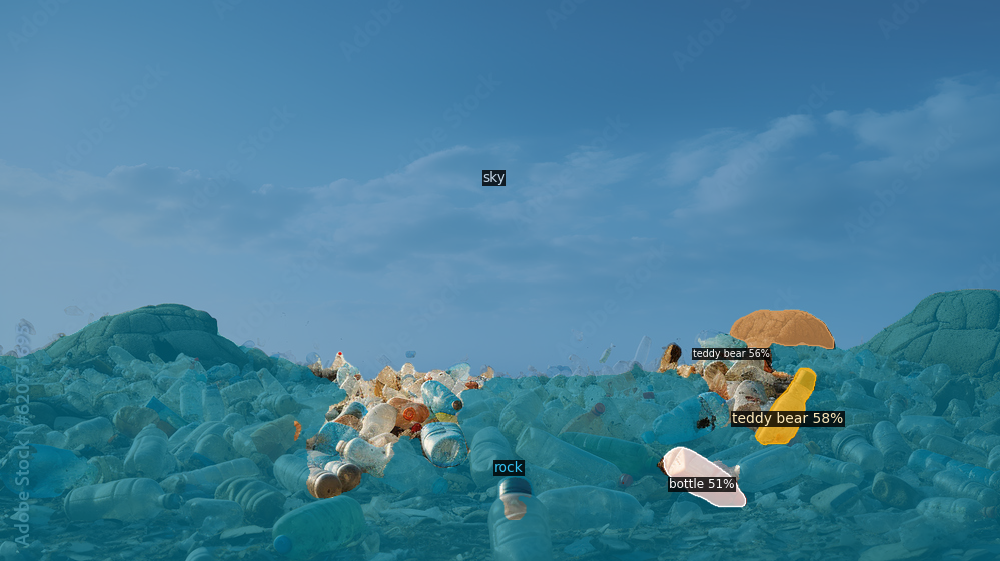

In [17]:
# Panoptic Segmentation Visualizer
# We can use `Visualizer` to draw the predictions on the image.
predictions, segmentInfo = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
# Uncomment to filter out specific segments
# out = v.draw_panoptic_seg_predictions(predictions.to("cpu"), list(filter(lambda x: x['category_id'] == 17, segmentInfo)), area_threshold=.1)
out = v.draw_panoptic_seg_predictions(predictions.to("cpu"), segmentInfo, area_threshold=.1)
cv2_imshow(out.get_image()[:, :, ::-1])

### Process Video Panoptic Segmentation

Ref: https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/

[Sample video](https://www.istockphoto.com/video/forward-driving-perspective-on-pennsylvania-avenue-in-dc-gm911535028-250974474)

In [18]:
# Load video sample
!wget https://www.youtube.com/watch?v=ju_2NuK5O-E -q -O dc-street.mp4

In [41]:
!pip install pytube

In [53]:
# Import required libraries
import urllib.request
import cv2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Initialize Detectron2 config and predictor
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
predictor = DefaultPredictor(cfg)

# Download video from the URL
video_url = 'https://v.ftcdn.net/03/31/78/56/700_F_331785611_2UwlQOP7rZByFjNy2FHdhHgyBKe2vpjo_ST.mp4'
urllib.request.urlretrieve(video_url, 'downloaded_video.mp4')

# Initialize video capture object
vid = cv2.VideoCapture('downloaded_video.mp4')

# Get video dimensions
videoWidth = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
videoHeight = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize video writer object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
frame_rate = 24.0
output = cv2.VideoWriter('processed_video.mp4', fourcc, frame_rate, (videoWidth, videoHeight))

# Loop through video frames
frame_count = 0  # Counter for frames
while True:
    ret, frame = vid.read()
    if not ret:
        print("End of video.")
        break

    print(f"Processing frame {frame_count}...")
    outputs = predictor(frame)
    print(f"Model output: {outputs.keys()}")

    if "panoptic_seg" in outputs:
        print("Visualizing and writing frame...")
        panoptic_seg, segments_info = outputs["panoptic_seg"]
        v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

        # Save first frame as an image for debugging
        if frame_count == 0:
            cv2.imwrite("first_frame.jpg", out.get_image()[:, :, ::-1])

        output.write(out.get_image()[:, :, ::-1])

    frame_count += 1  # Increment frame counter

# Release resources
print("Releasing resources...")
vid.release()
output.release()
cv2.destroyAllWindows()





[10/20 01:25:57 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl ...
Processing frame 0...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 1...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 2...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 3...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 4...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 5...
Model output: dict_keys(['sem_seg', 'instances', 'panoptic_seg'])
Visualizing and writing frame...
Processing frame 6...
Model output: dict_keys(['sem_seg',

In [50]:
!pip install opencv-python


In [52]:
from IPython.display import HTML
from base64 import b64encode

video_path = "/content/processed_video.mp4"

mp4 = open(video_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

